In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from dataset import *
from save_load import *
from NN_library.MN.material_NN import *
from NN_library.MN.train_MNN import *
%load_ext autoreload
%autoreload 2

Using device: cuda


In [2]:
data = dataset_Sobol(14, [0, 2*np.pi], [0, 2*np.pi])
loaders = get_loaders_Sobol(data, 2**14+4)

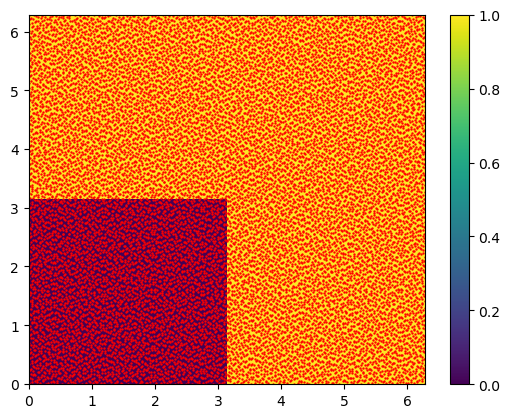

In [3]:
L = 2*np.pi
N = 512 # number of nodes in each direction including the border
x = np.linspace(0, L, N, endpoint=True)
y = np.linspace(0, L, N, endpoint=True)

XY = np.meshgrid(x, y)
grid_data = torch.tensor(np.vstack((XY[0].flatten(), XY[1].flatten())).T, dtype=torch.float, device=dev)

def a_function(x,y):
    a = np.where((x<np.pi)&(y<np.pi), 0, 1)
    return a

def A(x):
    a = torch.where((x[:,0]<torch.pi)&(x[:,1]<torch.pi)&(x[:,0]>0)&(x[:,1]>0), 0., 1.).view(-1,1)
    return a

Z = a_function(XY[0].flatten(),XY[1].flatten())
plt.pcolormesh(XY[0], XY[1], Z.reshape(N, N))
plt.colorbar()
plt.scatter(data[:,0], data[:,1], s = 0.5, c='r')

In [6]:
net = Material_NN()
total_params = sum(p.numel() for p in net.parameters())
print(f"Number of parameters: {total_params}")
args = {'lr' : 0.001, 'epochs' : 40000, 'dev' : dev, 'name' : f'NN_library/MN/MN_{total_params}'}

Using device: cuda
Number of parameters: 16


In [47]:
net = load_network(net, args['name']+'_9999', args)
net = net.to(dev)

In [13]:
losses_train, losses_val = train(net, loaders, args, A)

Epoch: 99 mean train loss:  5.63090711e-08, mean val. rec. loss:  8.31989658e-06
Epoch: 199 mean train loss:  5.59161338e-08, mean val. rec. loss:  8.32226697e-06
Epoch: 299 mean train loss:  5.55271498e-08, mean val. rec. loss:  8.32406649e-06
Epoch: 399 mean train loss:  5.51371393e-08, mean val. rec. loss:  8.32575029e-06
Epoch: 499 mean train loss:  5.47521440e-08, mean val. rec. loss:  8.32662680e-06
Epoch: 599 mean train loss:  5.43704058e-08, mean val. rec. loss:  8.32673864e-06
Epoch: 699 mean train loss:  5.39892713e-08, mean val. rec. loss:  8.32754095e-06
Epoch: 799 mean train loss:  5.36118166e-08, mean val. rec. loss:  8.32736045e-06
Epoch: 899 mean train loss:  5.32356583e-08, mean val. rec. loss:  8.32751272e-06
Epoch: 999 mean train loss:  5.28641351e-08, mean val. rec. loss:  8.32693853e-06
Epoch: 1099 mean train loss:  5.24941393e-08, mean val. rec. loss:  8.32645847e-06
Epoch: 1199 mean train loss:  5.21268819e-08, mean val. rec. loss:  8.32603212e-06
Epoch: 1299 mea

In [ ]:
np.save(f'NN_library/training_data/MN_{total_params}_2', np.vstack([losses_train, losses_val]))

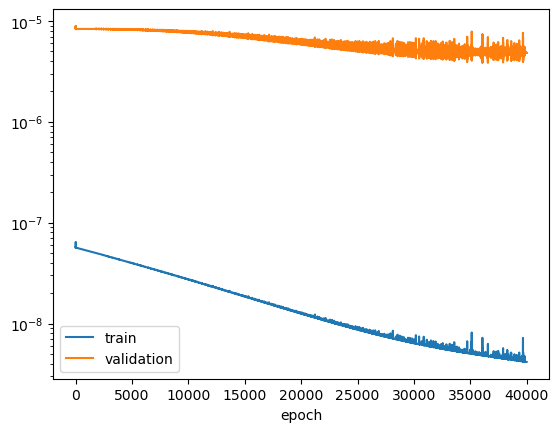

In [14]:
plt.plot(losses_train)
plt.plot(losses_val)
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.yscale('log')

In [16]:
mat = net(grid_data).detach().cpu()

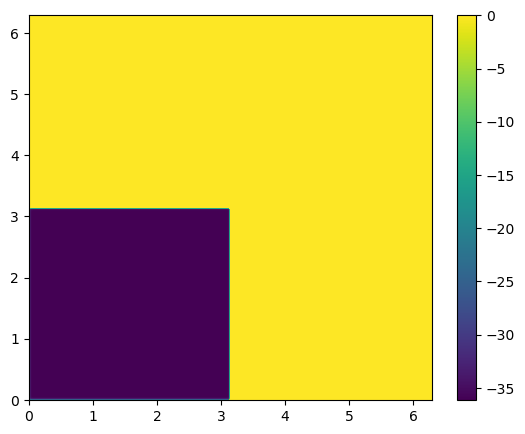

In [17]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(6.5,5))
pos1 = axs.pcolormesh(XY[0], XY[1], np.log10(mat.reshape(N, N)))
fig.colorbar(pos1)